In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset (assume uploaded as 'dataset.csv')
df = pd.read_csv('dataset.csv')

# Convert categorical columns using Label Encoding
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = LabelEncoder()
for feature in categorical:
    df[feature] = encoder.fit_transform(df[feature])

# Separate features and target
features = df.drop('price', axis=1)
target = df['price']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create and train the regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_output = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_output)
mse = mean_squared_error(y_test, y_output)
r2 = r2_score(y_test, y_output)

print("Mean Absolute Error :", mae)
print("Mean Squared Error  :", mse)
print("R² Score            :", r2)

# Plot actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_output, color='teal')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.tight_layout()
plt.savefig("scatter plot.png")
plt.show()

# Save predictions to CSV
results = X_test.copy()
results['Actual Price'] = y_test.values
results['Predicted Price'] = y_output
results.to_csv('price_predictions.csv', index=False)

# Download the result in Colab
from google.colab import files
files.download('price_predictions.csv')


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Convert categorical columns using Label Encoding
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = LabelEncoder()
for feature in categorical:
    df[feature] = encoder.fit_transform(df[feature])

In [5]:
features = df.drop('price', axis=1)
target = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_output = lr_model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_output)
mse = mean_squared_error(y_test, y_output)
r2 = r2_score(y_test, y_output)
print("Mean Absolute Error :", mae)
print("Mean Squared Error  :", mse)
print("R² Score            :", r2)

Mean Absolute Error : 716583.439661547
Mean Squared Error  : 986041803890.0269
R² Score            : 0.6578047592637595


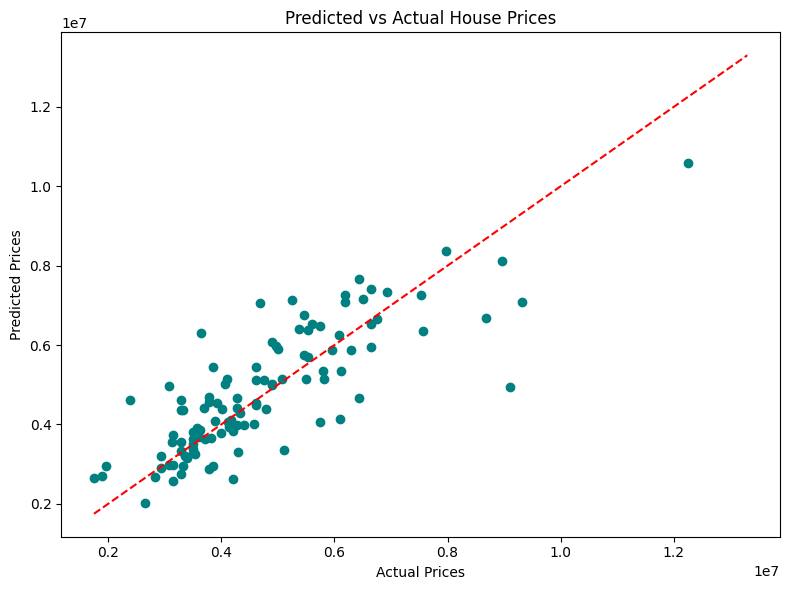

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_output, color='teal')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.tight_layout()
plt.savefig("scatter plot.png")
plt.show()
results = X_test.copy()
results['Actual Price'] = y_test.values
results['Predicted Price'] = y_output
results.to_csv('predictions_output.csv', index=False)
from google.colab import files
files.download('predictions_output.csv')